In [1]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-fra

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=ced63756feedc7ba73d09eca8b4588972176e7cca41c3739a6cb923eae9c59a9
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-fra tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 5,321 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e0

In [2]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import urllib.request

In [4]:
#we are going to download the image 
img_url = "https://www.lebabi.net/mfupdata/1380281641carte%20didentite.jpeg" #"https://www.zupimages.net/up/21/08/npla.jpg" #
img_url_2 = 'https://africabusinessagency.com/wp-content/uploads/obolwonci_1491408904_15_170405.jpg'
urllib.request.urlretrieve(img_url, "./identity.jpg")

('./identity.jpg', <http.client.HTTPMessage at 0x7fceaf02f8d0>)

 

 

Immatriculation ; C 0101 8915 45

 

M474

Sexe Taille (uy

2214211972

Date de Naissanz2
ANYAMA-ACJAME [CiV}

fut de Naissancs
State te 13/10/2009 — vatoe jusqu'au 12/10/2019
4 UROPE

  



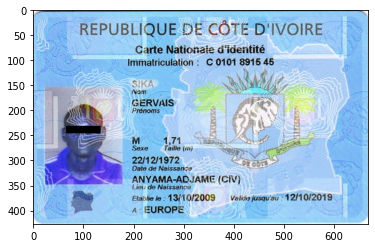

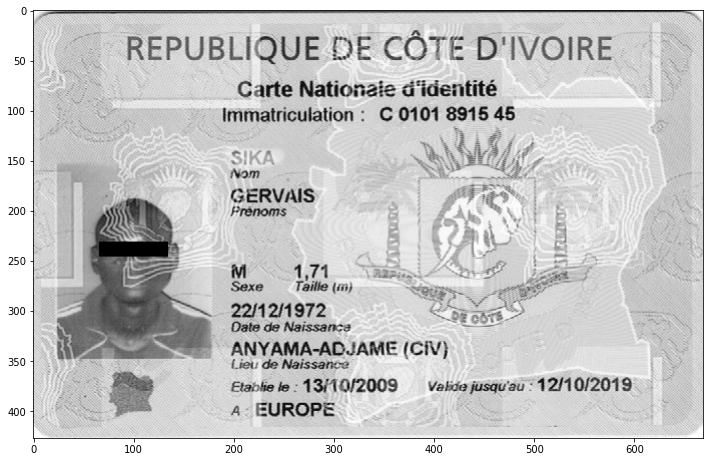

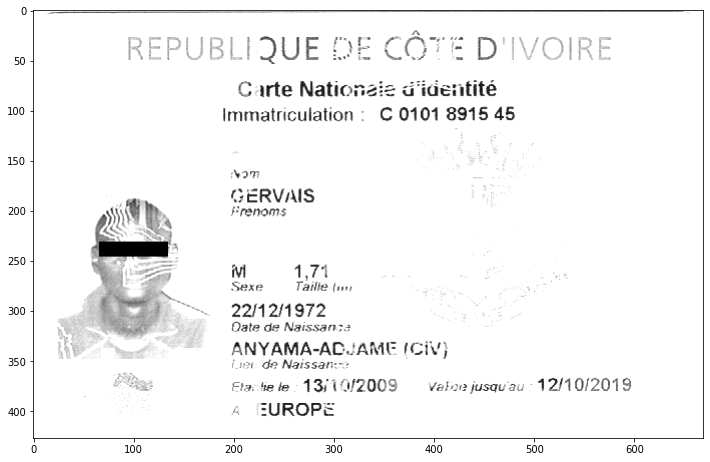

In [5]:
img_path = "./identity.jpg"
img = cv2.imread(img_path)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
display(threshed)
#fra : français, eng: anglais
text1 = pytesseract.image_to_data(threshed, lang="eng",output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="eng")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [6]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [7]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    669   
1       2         1          1        0         0         0    18    1    630   
2       3         1          1        1         0         0    18    1    630   
3       4         1          1        1         1         0    18    1    630   
4       5         1          1        1         1         1    18    1    630   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
61      5         1          9        1         3         2   228  392     73   
62      2         1         10        0         0         0    55  184    264   
63      3         1         10        1         0         0    55  184    264   
64      4         1         10        1         1         0    55  184    264   
65      5         1         10        1         1         1    55  184    264   

    height  conf 

In [8]:
from pytesseract import Output

img = cv2.imread(img_path)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


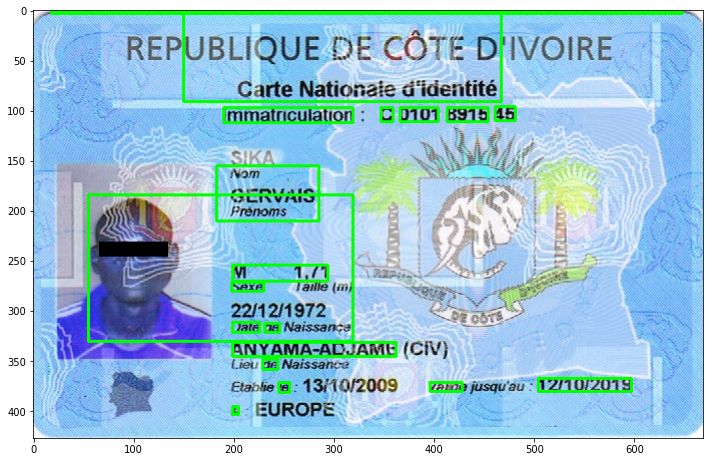

In [9]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

## Extract all the text in a string

In [10]:
img_data = pytesseract.image_to_string(Image.open(img_path), lang='eng')

In [11]:
print(img_data)

 

REPUBLIQUE DE COTE D'IVOIRE

Carte Nationzie didentité
Immatriculation : C 0101 8915 45

SIKA,

Nom
GERVAIS
Prenoms

M 1,71
Sexe Taille (ss)

22/12/1972

Date de Naissance
ANYAMA-ADJAME (Civ)
Lieu de Naissance

Etaplie te: 13/10/2009 — Valige jusqu'su * 12/10/2019
A EUROPE

  



In [12]:
img_data

" \n\nREPUBLIQUE DE COTE D'IVOIRE\n\nCarte Nationzie didentité\nImmatriculation : C 0101 8915 45\n\nSIKA,\n\nNom\nGERVAIS\nPrenoms\n\nM 1,71\nSexe Taille (ss)\n\n22/12/1972\n\nDate de Naissance\nANYAMA-ADJAME (Civ)\nLieu de Naissance\n\nEtaplie te: 13/10/2009 — Valige jusqu'su * 12/10/2019\nA EUROPE\n\n  \n\x0c"

## Convert the string to a table

In [13]:
table_img_data = img_data.split('\n')

In [14]:
table_img_data

[' ',
 '',
 "REPUBLIQUE DE COTE D'IVOIRE",
 '',
 'Carte Nationzie didentité',
 'Immatriculation : C 0101 8915 45',
 '',
 'SIKA,',
 '',
 'Nom',
 'GERVAIS',
 'Prenoms',
 '',
 'M 1,71',
 'Sexe Taille (ss)',
 '',
 '22/12/1972',
 '',
 'Date de Naissance',
 'ANYAMA-ADJAME (Civ)',
 'Lieu de Naissance',
 '',
 "Etaplie te: 13/10/2009 — Valige jusqu'su * 12/10/2019",
 'A EUROPE',
 '',
 '  ',
 '\x0c']

## Clean the data

In [15]:
# using remove() to 
# perform removal 
while("" in table_img_data) : 
    table_img_data.remove("")

# using filter() to 
# perform removal 
table_img_data = list(filter(None, table_img_data)) 

table_img_data

[' ',
 "REPUBLIQUE DE COTE D'IVOIRE",
 'Carte Nationzie didentité',
 'Immatriculation : C 0101 8915 45',
 'SIKA,',
 'Nom',
 'GERVAIS',
 'Prenoms',
 'M 1,71',
 'Sexe Taille (ss)',
 '22/12/1972',
 'Date de Naissance',
 'ANYAMA-ADJAME (Civ)',
 'Lieu de Naissance',
 "Etaplie te: 13/10/2009 — Valige jusqu'su * 12/10/2019",
 'A EUROPE',
 '  ',
 '\x0c']

In [17]:
table_img_data[6]

'GERVAIS'